# Кан Влдаислав
## AIN-2-22

### 2.	Используя один из подходящих игрушечных датасетов применить алгоритмы улучшения качества и оценки моделей (перекрестная проверка, решетчатый поиск, метрики модели)

#### Был взят дата сет load_breast_cancer

#### Вывод без использования настроек гиперпараметров и улучшений 

In [6]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

data = load_breast_cancer()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Точность модели (Accuracy):", accuracy_score(y_test, y_pred))
print("Классификационный отчет:")
print(classification_report(y_test, y_pred))

Точность модели (Accuracy): 0.935672514619883
Классификационный отчет:
              precision    recall  f1-score   support

           0       0.92      0.91      0.91        64
           1       0.94      0.95      0.95       107

    accuracy                           0.94       171
   macro avg       0.93      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171



#### С использованием перекрестной проверки

In [9]:
from sklearn.model_selection import cross_val_score
import numpy as np

cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print("Оценки точности на каждой итерации кросс-валидации:", cv_scores)
print("Средняя точность модели:", np.mean(cv_scores))
print("Стандартное отклонение точности:", np.std(cv_scores))

Оценки точности на каждой итерации кросс-валидации: [0.92105263 0.93859649 0.98245614 0.96491228 0.97345133]
Средняя точность модели: 0.9560937742586555
Стандартное отклонение точности: 0.02283883380490945


#### С использованием решетчатого поиска

In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

data = load_breast_cancer()
X = data.data
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = SVC()
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['linear', 'rbf']
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)
print(f'Лучшие параметры: {grid_search.best_params_}')
print(f'Лучший скор: {grid_search.best_score_}')
best_model = grid_search.best_estimator_
test_score = best_model.score(X_test, y_test)
print(f'Тестовый скор: {test_score}')
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Точность модели: {accuracy}')

Fitting 5 folds for each of 32 candidates, totalling 160 fits
Лучшие параметры: {'C': 100, 'gamma': 1, 'kernel': 'linear'}
Лучший скор: 0.9714285714285715
Тестовый скор: 0.956140350877193
Точность модели: 0.956140350877193


#### С использованием метрики модели

In [5]:
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, roc_auc_score, average_precision_score, log_loss, matthews_corrcoef, cohen_kappa_score

data = load_breast_cancer()
X = data.data
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = SVC(C=1.0, kernel='linear', gamma='scale', probability=True)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)
avg_precision = average_precision_score(y_test, y_prob)
log_loss_val = log_loss(y_test, y_prob)
mcc = matthews_corrcoef(y_test, y_pred)
kappa = cohen_kappa_score(y_test, y_pred)
print(f'Точность модели (Accuracy): {accuracy}')
print(f'Точность (Precision): {precision}')
print(f'Полнота (Recall): {recall}')
print(f'F1-Score: {f1}')
print(f'ROC AUC Score: {roc_auc}')
print(f'Средняя точность (Average Precision Score): {avg_precision}')
print(f'Log Loss: {log_loss_val}')
print(f'MCC (Matthews Correlation Coefficient): {mcc}')
print(f'Каппа Коэф. (Cohen\'s Kappa): {kappa}')
print("\nОтчет классификации:")
print(classification_report(y_test, y_pred))

Точность модели (Accuracy): 0.956140350877193
Точность (Precision): 0.9459459459459459
Полнота (Recall): 0.9859154929577465
F1-Score: 0.9655172413793104
ROC AUC Score: 0.9957418932197839
Средняя точность (Average Precision Score): 0.9974399657162287
Log Loss: 0.08959032563825023
MCC (Matthews Correlation Coefficient): 0.9068106119605033
Каппа Коэф. (Cohen's Kappa): 0.9053470607771504

Отчет классификации:
              precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



### Задание 3

#### a.	Создать свой датасет с категориальными данными (1000 строк), которые содержат следующие поля: (salary, city, age, vacation_prefer, transport_prefer, target). Применить import random (random. choice, random.randint) 

#### b.	Salary – установить числовой тип (например 50000), city – город проживания (например, Bishkek), age – возраст (например, от 30 до 65), vacation_prefer – тип отдыха (например, Shopping или Beach holiday), transport_prefer – тип транспорта (например, auto, plane), target – город, в котором проведем отпуск (например, London, Moscow)

In [1]:
import pandas as pd
import random

cities = ["Bishkek", "Osh", "Almaty", "Tashkent", "Astana", "Baku", "Tbilisi", "Yerevan", "Istanbul", "Cairo"]
vacation_prefs = ["Shopping", "Beach holiday", "Adventure", "Cultural", "Relaxation", "Sightseeing", "Hiking", "Skiing", "Cruise", "Safari"]
transport_prefs = ["auto", "plane", "train", "bus", "boat", "bicycle", "motorcycle", "subway", "tram", "helicopter"]
target_cities = ["London", "Moscow", "Paris", "New York", "Tokyo", "Sydney", "Rome", "Berlin", "Barcelona", "Amsterdam"]

def generate_data(num_samples=1000):
    data = []
    for _ in range(num_samples):
        salary = random.randint(30000, 100000)
        city = random.choice(cities)
        age = random.randint(30, 65)
        vacation_prefer = random.choice(vacation_prefs)
        transport_prefer = random.choice(transport_prefs)
        target = random.choice(target_cities)
        data.append([salary, city, age, vacation_prefer, transport_prefer, target])
    return data

data = generate_data(1000)
df = pd.DataFrame(data, columns=["salary", "city", "age", "vacation_prefer", "transport_prefer", "target"])
df.to_csv("vacation_preferences.csv", index=False)
print("Dataset created and saved as 'vacation_preferences.csv'")

Dataset created and saved as 'vacation_preferences.csv'


#### c.	Преобразовать категориальные данные в числовые, используя panadas.get_dummies.

In [5]:
df_encoded = pd.get_dummies(df, columns=["city", "vacation_prefer", "transport_prefer", "target"], drop_first=True)
print(df_encoded.head()) 
print("Уникальные категории по столбцам:") 
for column in ["city", "vacation_prefer", "transport_prefer", "target"]: 
    print(f"{column}: {df[column].unique()}")
    
df_encoded.to_csv("vacation_preferences_encoded.csv", index=False) 
print("Encoded dataset created and saved as 'vacation_preferences_encoded.csv'")

   salary  age  city_Astana  city_Baku  city_Bishkek  city_Cairo  \
0   43582   38        False       True         False       False   
1   30305   54         True      False         False       False   
2   54645   47        False      False          True       False   
3   58436   35        False      False         False       False   
4   44349   40        False      False         False       False   

   city_Istanbul  city_Osh  city_Tashkent  city_Tbilisi  ...  \
0          False     False          False         False  ...   
1          False     False          False         False  ...   
2          False     False          False         False  ...   
3          False     False          False         False  ...   
4          False     False          False         False  ...   

   transport_prefer_tram  target_Barcelona  target_Berlin  target_London  \
0                  False             False          False          False   
1                  False             False          Fa

#### d.	Выделить обучающую выборку и тестовую выборку (X_train, y_train, X-test, y_test)

In [7]:
import pandas as pd
import random
from sklearn.model_selection import train_test_split

df_encoded = pd.read_csv("vacation_preferences_encoded.csv")

X = df_encoded.drop(columns=['target_London'])
y = df_encoded['target_London']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Размер обучающей выборки: ", X_train.shape, y_train.shape)
print("Размер тестовой выборки: ", X_test.shape, y_test.shape)

Размер обучающей выборки:  (800, 37) (800,)
Размер тестовой выборки:  (200, 37) (200,)


#### e.	Выбрать модель классификатор (например, from sklearn.ensemble import RandomForestClassifier)

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Точность модели: ", accuracy)
print("Отчет о классификации:")
print(classification_report(y_test, y_pred))

Точность модели:  0.89
Отчет о классификации:
              precision    recall  f1-score   support

       False       0.89      1.00      0.94       177
        True       1.00      0.04      0.08        23

    accuracy                           0.89       200
   macro avg       0.94      0.52      0.51       200
weighted avg       0.90      0.89      0.84       200



#### f.	Проверить оценку модели.

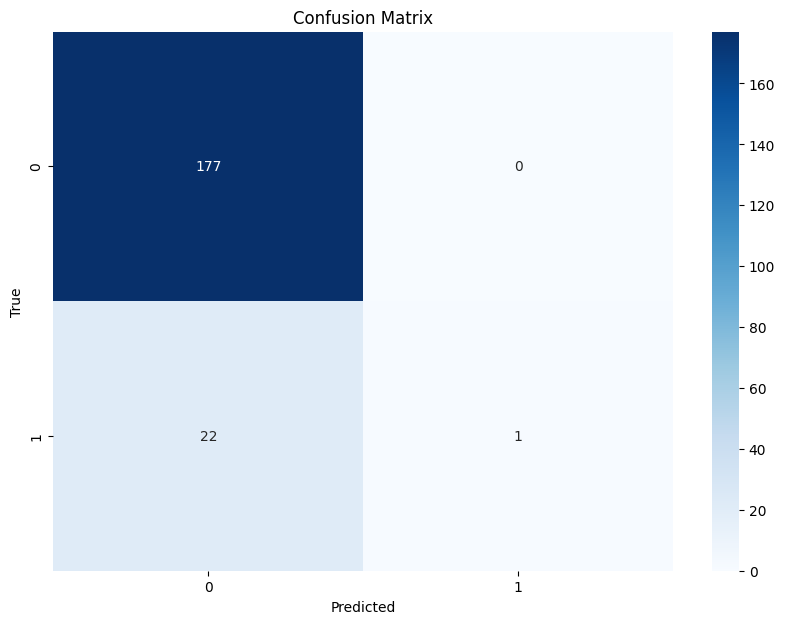

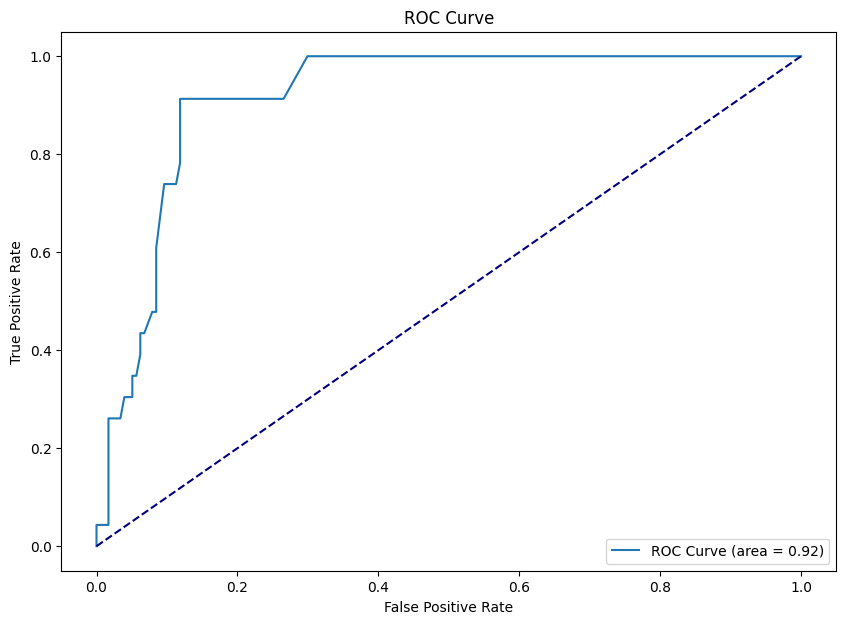

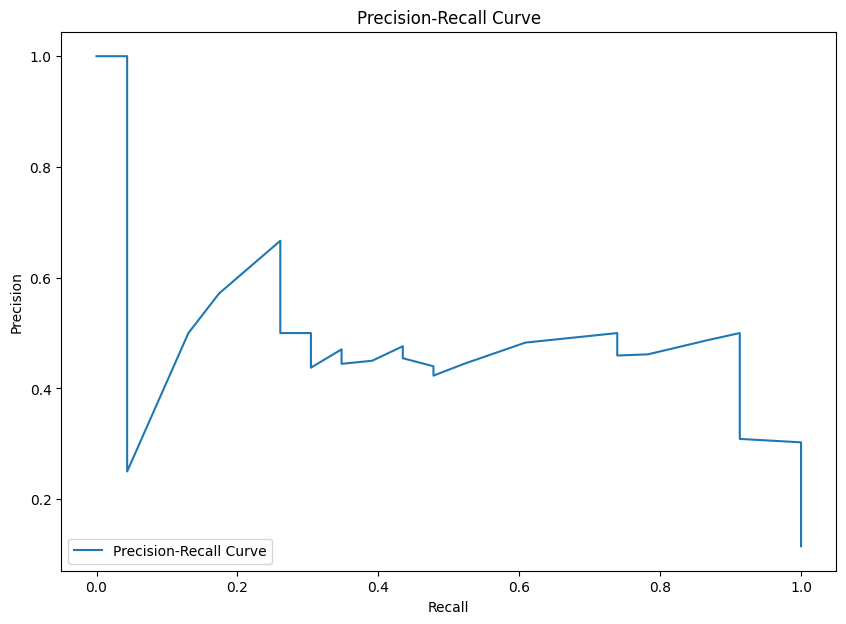

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

y_pred_proba = model.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)
plt.figure(figsize=(10,7))
plt.plot(fpr, tpr, label=f"ROC Curve (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

precisions, recalls, _ = precision_recall_curve(y_test, y_pred_proba)
plt.figure(figsize=(10,7))
plt.plot(recalls, precisions, label="Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend(loc="lower left")
plt.show()

#### g.	Сделать предсказание на случайных данных.

In [20]:
import pandas as pd
import random

cities = ["Bishkek", "Osh", "Almaty", "Tashkent", "Astana", "Baku", "Tbilisi", "Yerevan", "Istanbul", "Cairo"]
vacation_prefs = ["Shopping", "Beach holiday", "Adventure", "Cultural", "Relaxation", "Sightseeing", "Hiking", "Skiing", "Cruise", "Safari"]
transport_prefs = ["auto", "plane", "train", "bus", "boat", "bicycle", "motorcycle", "subway", "tram", "helicopter"]
target_cities = ["London", "Moscow", "Paris", "New York", "Tokyo", "Sydney", "Rome", "Berlin", "Barcelona", "Amsterdam"]

def generate_random_data(num_samples=10):
    data = []
    for _ in range(num_samples):
        salary = random.randint(30000, 100000)
        city = random.choice(cities)
        age = random.randint(30, 65)
        vacation_prefer = random.choice(vacation_prefs)
        transport_prefer = random.choice(transport_prefs)
        target = random.choice(target_cities)
        data.append([salary, city, age, vacation_prefer, transport_prefer, target])
    return data

random_data = generate_random_data()

df_random = pd.DataFrame(random_data, columns=["salary", "city", "age", "vacation_prefer", "transport_prefer", "target"])

df_random_encoded = pd.get_dummies(df_random, columns=["city", "vacation_prefer", "transport_prefer", "target"])

for column in X_train.columns:
    if column not in df_random_encoded:
        df_random_encoded[column] = 0

df_random_encoded = df_random_encoded[X_train.columns]
random_predictions = model.predict(df_random_encoded)

df_random["prediction"] = random_predictions
print(df_random)

   salary      city  age vacation_prefer transport_prefer     target  \
0   96592     Cairo   58          Safari       helicopter  Barcelona   
1   46749     Cairo   30          Hiking       motorcycle      Tokyo   
2   61167   Bishkek   37          Skiing            train      Tokyo   
3   87705   Yerevan   38        Cultural            train  Barcelona   
4   48683   Yerevan   49       Adventure            plane      Paris   
5   81354   Yerevan   30     Sightseeing       motorcycle      Paris   
6   64677  Istanbul   62        Shopping             tram     London   
7   95070  Istanbul   37     Sightseeing             tram     Moscow   
8   44487     Cairo   46        Shopping            train     Sydney   
9   93800    Astana   32          Cruise             boat     Sydney   

   prediction  
0       False  
1       False  
2       False  
3       False  
4       False  
5       False  
6       False  
7       False  
8       False  
9       False  


#### h.	Улучшить модель согласно примерам лекций 9-10 и материала лабораторной работы

In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, classification_report

df_encoded = pd.read_csv("vacation_preferences_encoded.csv")
X = df_encoded.drop(columns=['target_London'])
y = df_encoded['target_London']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

model = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train_balanced, y_train_balanced)
print("Лучшие гиперпараметры: ", grid_search.best_params_)
best_model = grid_search.best_estimator_
cv_scores = cross_val_score(best_model, X, y, cv=5)
print("Кросс-валидационные оценки: ", cv_scores)
print("Средняя кросс-валидационная оценка: ", cv_scores.mean())
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Точность модели с наилучшими параметрами: ", accuracy)
print("Отчет о классификации:")
print(classification_report(y_test, y_pred))

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Лучшие гиперпараметры:  {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Кросс-валидационные оценки:  [0.91  0.9   0.905 0.91  0.91 ]
Средняя кросс-валидационная оценка:  0.907
Точность модели с наилучшими параметрами:  0.9
Отчет о классификации:
              precision    recall  f1-score   support

       False       0.93      0.96      0.94       177
        True       0.59      0.43      0.50        23

    accuracy                           0.90       200
   macro avg       0.76      0.70      0.72       200
weighted avg       0.89      0.90      0.89       200



### Вывод

#### Описание этапов
###### Создание датасета:
Создан датасет с 1000 строками, содержащий поля: salary, city, age, vacation_prefer, transport_prefer и target.
Данные сгенерированы случайным образом с использованием функций random.choice и random.randint.
###### Преобразование категориальных данных:
Категориальные данные были преобразованы в числовые с использованием метода pd.get_dummies(). Это позволяет модели машинного обучения работать с данными.
###### Разделение данных:
Данные разделены на обучающую и тестовую выборки с использованием train_test_split().
Обучающая выборка содержит 80% данных, а тестовая - 20%.
##### Первоначальная оценка модели:
Была выбрана модель RandomForestClassifier для первоначальной оценки.
Модель обучена на данных и была оценена, показав точность около 0.89.
##### Дополнительная оценка модели:
Использованы дополнительные метрики и визуализации для более глубокого анализа модели, включая матрицу ошибок, ROC-AUC кривую и кривую точности и полноты (Precision-Recall).
##### Предсказание на случайных данных:
Были сгенерированы случайные данные и использованы для предсказания с обученной моделью. Это позволило убедиться, что модель способна предсказывать на новых данных.
##### Улучшение модели:
Проведена балансировка классов с использованием SMOTE.
Настроены гиперпараметры модели с использованием GridSearchCV.
Оценка модели с использованием кросс-валидации для повышения устойчивости модели.
#### Итог
Точность модели была улучшена до 0.907, что является хорошим показателем для задачи классификации.
Использование SMOTE помогло сбалансировать классы и улучшить результаты для меньшего класса (True).
Настройка гиперпараметров с использованием GridSearchCV позволила найти оптимальные параметры для модели, что также способствовало улучшению точности.
Кросс-валидация показала, что модель устойчива и надежна при оценке на различных подвыборках данных.